In [2]:
import os
import torch

In [3]:
from Class_Analytics_Generator import settings
model = torch.load('./static/resources/model.pt',weights_only=False,map_location=torch.device('cpu'))

In [4]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [5]:
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [1]:
from intelligence import driver
import cv2 as cv

In [7]:
# cam = driver.Camera()
# frame = cam.getFrame()
# resized_frame = cam.resizeFrame(frame,(48,48))

In [6]:
image = cv.imread('test1.jpg')
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
resized_frame = cv.resize(gray_image,(48,48))


In [7]:

cv.imshow('hlo',resized_frame)
print(resized_frame)
cv.waitKey(10)
cv.destroyAllWindows()

[[164 162 163 ... 130 133 135]
 [166 163 165 ... 135 133 136]
 [165 165 168 ... 134 136 138]
 ...
 [  8   8  11 ...  49  31  15]
 [  8   9   8 ...  76  12  14]
 [  7  11  10 ...  60  19  14]]


In [10]:
from torchvision import transforms

In [11]:
transforms_obj = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

image = transforms_obj(image)

model(image)

ValueError: expected 4D input (got 3D input)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfe = pd.read_csv('./static/resources/301-201-07-02-25.csv')

In [14]:
timestamp = dfe.iloc[:]['timeStamp']
print(timestamp)

0    09:29:51
1    09:29:56
2    09:30:01
3    09:30:06
4    09:30:11
Name: timeStamp, dtype: object


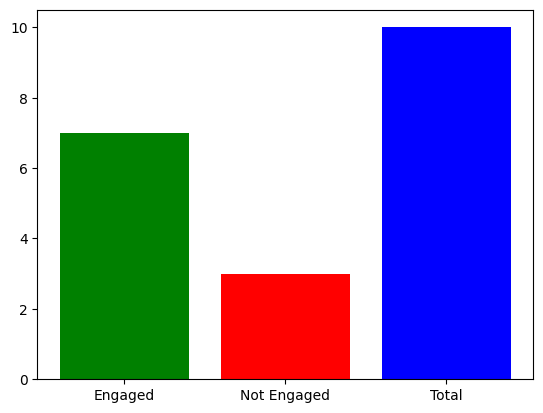

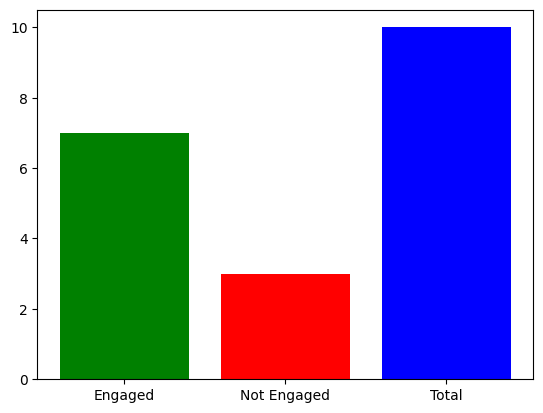

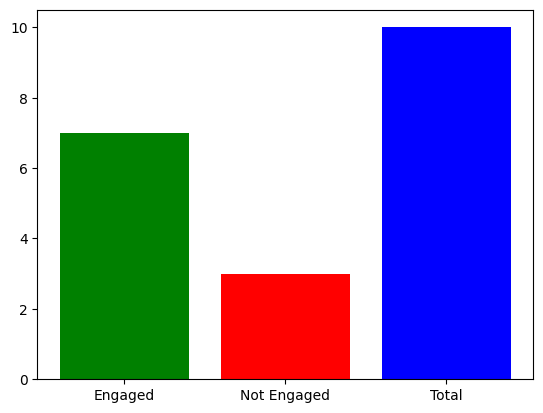

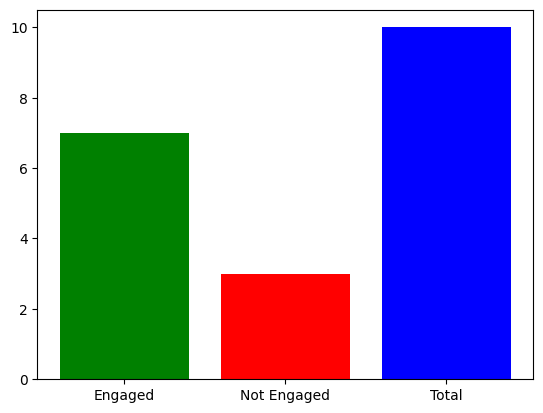

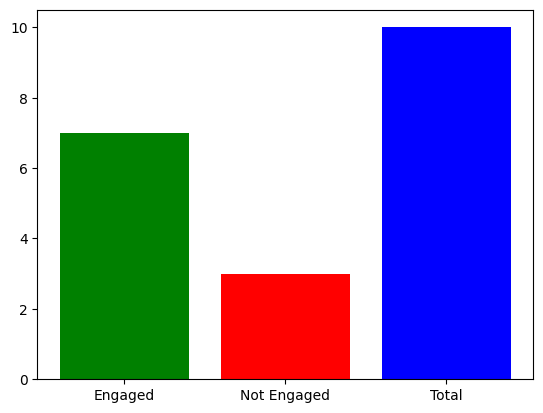

In [26]:
for i in range(len(dfe)):
    X = ["Engaged","Not Engaged","Total"]
    Y = [dfe.iloc[i]['Engaged'],dfe.iloc[i]['Not Engaged'],dfe.iloc[i]['total']]
    plt.bar(X,Y,color=['green','red','blue'])
    plt.show()


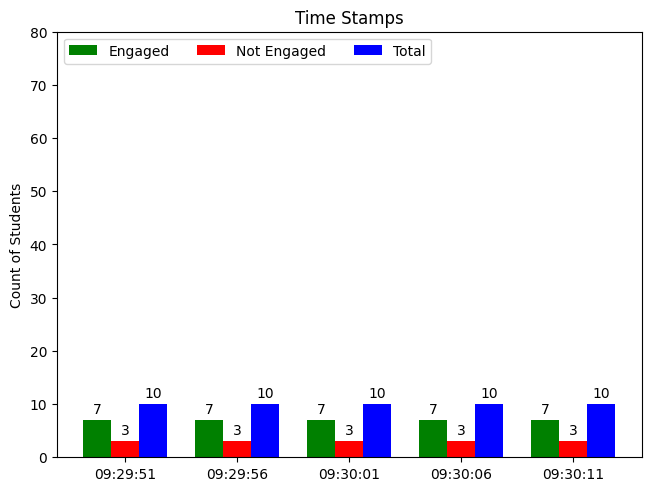

In [25]:
import numpy as np
timestamps = dfe.iloc[:]['timeStamp']
values = {
    'Engaged' : dfe.iloc[:]['Engaged'],
    'Not Engaged' : dfe.iloc[:]['Not Engaged'],
    'Total' : dfe.iloc[:]['total'],
}
x = np.arange(len(timestamps))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
ref = {
    'Engaged':"green",
    "Not Engaged":"red",
    "Total":"blue"
}

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,color=ref[attribute])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Students')
ax.set_title('Time Stamps')
ax.set_xticks(x + width, timestamps)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 80)

plt.show()